<img align="center" src="http://emba.eduego.com/Uploads/Ueditor/image/20180130/1517298966389236.jpg">
<h1 align="center" style="margin-top:10px">Conditional Monte-Carlo of OUSV and GARCH-diffusions</h1>
<h2 align="center" style="margin-top:20px">Team：Li Panyu, Li Linxiong</h2>
<br>

# 1. The Ornstein-Uhlenbeck stochastic volatility (OUSV) model

The ___Ornstein–Uhlenbeck process___ is an example of a ___Gaussian process___ that has a bounded variance and admits a stationary probability distribution, in contrast to the Wiener process; the difference between the two is in their "drift" term. For the Wiener process the drift term is constant, whereas for the Ornstein–Uhlenbeck process it is dependent on the current value of the process: if the current value of the process is less than the (long-term) mean, the drift will be positive; if the current value of the process is greater than the (long-term) mean, the drift will be negative. In other words, the mean acts as an equilibrium level for the process. This gives the process its informative name, "___mean-reverting___" 

### **Underline price process-following GBM**

$$\frac{dF_t}{F_t}=\sigma_t(\rho\,dB_t + \rho_*dX_t) \tag{1}$$

### **Volatility process-following OUSV**
$$d\sigma_t=\kappa\,(\theta-\sigma_t)\,dt+\xi\,dB_t \tag{2}$$  
**Solution**
$$\sigma_t=e^{-\kappa t}\sigma_0+\theta(1-e^{-\kappa t})+\frac{\sigma e^{-\kappa t}}{\sqrt{2\kappa}}B_{e^{-\kappa t}\, -1}\tag{3}$$
$$B_{e^{-\kappa t}\, -1}-B_{e^{-\kappa s}\, -1}\sim N(0, e^{-2\kappa t}-e^{-2\kappa s})\tag{4}$$  
**Mathematical properties**
$$E(\sigma_t)=\sigma_0 e^{-\kappa t}+\theta(1-e^{-\kappa t}) \tag{5}$$  
$$var(\sigma_T) = \frac{\xi^2}{2\kappa}(1-e^{-2\kappa t}) \tag{6}$$
$$cov(\sigma_s, \sigma_t)=\frac{\xi^2}{2\kappa}(e^{-\kappa|t-s|}-e^{-\kappa(t+s)}) \tag{7}$$

### **Expectation and BS volatilitty of stock price $F_T$**
$$F_T=F_0 exp\left(\frac{\rho}{\xi}({\sigma_T}^2-{\sigma_0}^2)-\frac{\rho\xi}{2}T-\frac{\rho\kappa\theta}{\xi}U_T+(\frac{\rho\kappa}{\xi}-\frac{\rho^2}{2})V_T\right)\,\,\,\,,where\,\,U_T=\int_{0}^{T}\sigma_tdt\,\,,and\,\,V_T=\int_{0}^{T}\sigma^2_tdt\tag{8}$$

$$\sigma_{BS} = \rho_*\sqrt{V_T/T} \tag{9}$$

### **OUSV conditional MC steps**

|**Tags**| **Steps** | **Formulas of algorithm** |
|----| - - - - | - - - - |
|**1**| Simulate BM increment and cumsum | $$B_{e^{-\kappa t}\, -1}-B_{e^{-\kappa s}\, -1}\sim N(0, e^{-2\kappa t}-e^{-2\kappa s})$$ |
|**2**| Simulate volatility path | $$\sigma_t=e^{-\kappa t}\sigma_0+\theta(1-e^{-\kappa t})+\frac{\sigma e^{-\kappa t}}{\sqrt{2\kappa}}B_{e^{-\kappa t}\, -1}$$ |
|**3**| Calculate forward conditional spot and volatility | $$F_T=F_0 exp\left(\frac{\rho}{\xi}({\sigma_T}^2-{\sigma_0}^2)-\frac{\rho\xi}{2}T-\frac{\rho\kappa\theta}{\xi}U_T+(\frac{\rho\kappa}{\xi}-\frac{\rho^2}{2})V_T\right)\,\,,\,\,\sigma_{BS} = \rho_*\sqrt{V_T/T}$$|
|**4**| Use BSM to calculate the option price |$$C_T=F_0N(d_1)-KN(d_2),d_{1,2}=\frac{log(F_0/K)}{\sigma\sqrt{T}}\pm\frac{1}{2}\sigma\sqrt{T}$$ |

where:  
$V_T=\int_0^T{\sigma_t}^2dt, U_T=\int_0^T\sigma_tdt$  
$F_t$ is the forward asset price,  
$\kappa$ is the speed of mean reversion,  
$\theta$ is the long-term volatility,  
$\xi$ is the volatility of the volatility $\sigma_t$,  
$\rho$ is the instantaneous correlation between asset price and volatility, $\rho_*=\sqrt{1-\rho^2}$   
$B_t$ and $X_t$ are two independent Brownian motions  

In [116]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [117]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(sys.path.index('') + 1, 'E:\PHBS\8.ASP\PyFENG')
# sys.path.insert(sys.path.index('') + 1, 'C:/Users/cherr/Documents/GitHub/PyFeng')
import pyfeng as pf

# OUSV TEST

## 1.1 Conditional MC

In [118]:
strike = np.array([100])
spot = 100
texp = np.array([1, 5, 10])
ousv = pf.OusvCondMC(sigma = 0.2, mr=4, vov = 0.1, rho=-0.7, intr=0.09531)
ousv.set_mc_params(dt=0.01, n_path=100000, rn_seed=123456, antithetic=False)

In [119]:
p = ousv.price(strike, spot, texp)
pd.DataFrame(data=p,columns=[texp],index=strike)

,1,5,10
100,13.134226,40.789507,63.052895


In [120]:
print(ousv.__dict__)

{'sigma': 0.2, 'intr': 0.09531, 'divr': 0.0, 'is_fwd': False, 'vov': 0.1, 'rho': -0.7, 'mr': 4, 'theta': 0.2, 'n_path': 100000, 'dt': 0.01, 'rn_seed': 123456, 'antithetic': False, 'rng': Generator(PCG64) at 0x20DCC9A0040}


In [121]:
strike = np.array([90, 100, 110])
spot = 100
texp = 1
ousv = pf.OusvCondMC(sigma = 0.25, mr=8, vov = 0.3, rho=-0.6, intr=0.09531)
ousv.set_mc_params(dt=0.01, n_path=100000, rn_seed=123456)

In [122]:
p = ousv.price(strike, spot, texp)
pd.DataFrame(data=p,columns=[texp],index=strike).T

,90,100,110
1,21.423184,15.172545,10.179046


In [123]:
strike = np.linspace(75,125,num=10)
spot = 100
texp = 1
ousv = pf.OusvCondMC(sigma=0.2, vov=0.5, rho=0.7, mr=2, theta=1)
ousv.set_mc_params(dt=0.01, n_path=100000, rn_seed=123456)

In [124]:
p = ousv.price(strike, spot, texp)
pd.DataFrame(data=p,columns=[texp],index=np.int64(np.around(strike))).T

,75,81,86,92,97,103,108,114,119,125
1,38.169943,35.658143,33.384311,31.321731,29.446513,27.737546,26.176292,24.746524,23.434052,22.226461


## 1.2 Schobel & Zhu (1998)'s approximation exact

In [125]:
model = pf.OusvIft(0.2, mr=4, vov=0.1, rho=-0.7, intr=0.09531)
p=model.price(100, 100, texp=np.array([1, 5, 10]))
pd.DataFrame(data=p[:,None].T,columns=np.array([1, 5, 10]),index=[100])

,1,5,10
100,13.213412,40.785145,62.674277


In [126]:
model = pf.OusvIft(0.25, mr=8, vov=0.3, rho=-0.6, intr=0.09531)
p = model.price(np.array([90, 100, 110]), 100, texp=1)
pd.DataFrame(data=p[:,None],columns=[100],index=np.array([90, 100, 110])).T

,90,100,110
100,21.416243,15.165753,10.17146


In [127]:
strike = np.linspace(75,125,num=10)
spot = 100
texp = 1
ousv_ift = pf.OusvIft(sigma=0.2, mr=2, vov=0.5, rho=0.7, theta=1)

In [128]:
p = ousv_ift.price(strike, spot, texp)
pd.DataFrame(data=p,columns=[texp],index=np.int64(np.around(strike))).T

,75,81,86,92,97,103,108,114,119,125
1,38.109676,35.598346,33.32456,31.26165,29.385771,27.675852,26.113393,24.682197,23.368102,22.158716


# 2. The Garch diffusion model:

### **Underline price process-following GBM**

$$\frac{dF_t}{F_t}=\sigma_t(\rho\,dB_t + \rho_*dX_t) \tag{1}$$

### **Volatility process-following Garch diffusion model**
$$dv_t=\kappa\,(\theta-v_t)\,dt+\upsilon v_t\,dB_t,\ \ \  where\ \ v_t=\sigma_t^2 \tag{2}$$  

#### **Analytical solution of volatility**
$$v_t=e^{-(\kappa+\frac{\upsilon^2}{2})t+\upsilon B_t}\left(v_0+\kappa \theta \int_{0}^{t}e^{(\kappa+\frac{\upsilon^2}{2})s-\upsilon B_s}ds \right) \tag{3}$$

#### **Milstein scheme of $v_t$**  
Since the analytical solution of $v_t$ includes the integral of Brownain motion, we cannot get the volatility path from equation 3 directely. We need to utilize the Euler or Milstein scheme to get the path. The Euler and Milstein schemes for $v_t$ is given by:(the boxed term is noly for Milstein scheme)

$$ v_{t+\Delta t}-v_t=\kappa (\theta-v_t)\Delta t+\upsilon v_tZ_1\sqrt{\Delta t}+ \boxed{\frac{\upsilon^2}{2}v_t(Z_1^2-1)\Delta t} \tag{4}$$

Note: The SDE for $v_t$ tells us that $v_t$ cannot go negative. However, in the MC simulation, with the time-discretization scheme, $v_t$ sometimes go negative. To avoid this problem, it is better simulate $\omega_t = logv_t$ instead. The Euler and Milstein schemes for $\omega_t$ is given by:(two schemes are the same)

$$ \omega_{t+\Delta t}-\omega_t=(\kappa \theta e^{-\omega t}-\kappa - \upsilon^{2}/2)\Delta t + \upsilon Z_1\sqrt{\Delta t} \tag{5}$$

$$ v_{t+\Delta t}=v_t exp(\omega_{t+\Delta t}-\omega_t) \tag{6}$$

### **Expectation and BS volatilitty of stock price $F_T$**

$$F_T=F_0 exp\left(\frac{2\rho}{\upsilon}(\sigma_T-\sigma_0)-\frac{\rho\kappa\theta}{\upsilon}Y_T+\rho(\frac{\kappa}{\upsilon}+\frac{\upsilon}{4})U_T-\frac{\rho^2}{2}V_T\right)\,\,\,\,,where\,\,Y_T=\int_{0}^{T}\frac{1}{\sigma_t}dt\,\,,\,\,U_T=\int_{0}^{T}\sigma_tdt\,\,,and\,\,V_T=\int_{0}^{T}\sigma^2_tdt \tag{7}$$

$$\sigma_{BS} = \rho_*\sqrt{V_T/T} \tag{8}$$

### **Garch MC steps**

|**Tags**| **Steps** | **Formulas of algorithm** |
|----| - - - - | - - - - |
|**1**| Simulate volatility path | $$ \omega_{t+\Delta t}=\omega_t+(\kappa \theta e^{-\omega t}-\kappa - \upsilon^{2}/2)\Delta t + \upsilon Z_1\sqrt{\Delta t}\,\,,\,\,v_t=e^{\omega_t}$$ |
|**2**| Calculate forward conditional spot and volatility |$$F_T=F_0 exp\left(\frac{2\rho}{\upsilon}(\sigma_T-\sigma_0)-\frac{\rho\kappa\theta}{\upsilon}Y_T+\rho(\frac{\kappa}{\upsilon}+\frac{\upsilon}{4})U_T-\frac{\rho^2}{2}V_T\right)\,\,,\,\,\sigma_{BS} = \rho_*\sqrt{V_T/T}$$|
|**3**| Use BSM to calculate the option price |$$C_T=F_0N(d_1)-KN(d_2),d_{1,2}=\frac{log(F_0/K)}{\sigma\sqrt{T}}\pm\frac{1}{2}\sigma\sqrt{T}$$ |

where:  
$Y_T=\int_{0}^{T}\frac{1}{\sigma_t}dt\,\,,\,\,U_T=\int_{0}^{T}\sigma_tdt\,\,,and\,\,V_T=\int_{0}^{T}\sigma^2_tdt$
$F_t$ is the forward asset price,  
$\kappa$ is the speed of mean reversion,  
$\theta$ is the long-term volatility,  
$\upsilon$ is the volatility of the square of the volatility $\sigma_t$,  
$\rho$ is the instantaneous correlation between asset price and volatility, $\rho_*=\sqrt{1-\rho^2}$   
$B_t$ and $X_t$ are two independent Brownian motions  

# Garch TEST

By setting the same parameter, we compare our results with the results of Barone-Adesi et al. (2004)'s approximation exact method.  

References:  
Barone-Adesi, G., Rasmussen, H., Ravanelli, C., 2005. An option pricing formula for the GARCH diffusion model. Computational Statistics & Data Analysis, 2nd CSDA Special Issue on Computational Econometrics 49, 287–310. https://doi.org/10.1016/j.csda.2004.05.014

In [14]:
c_1=0.16
c_2=18
c_3=1.8

rho=0# correlation between volatility and asset price
mr=c_2
theta_ratio=1.0
vov=c_3
sigma=np.sqrt(c_1/c_2) # start-up volatility
strike=np.arange(90,115,5) # strike price
spot=100 # spot asset price
texp=1/252*np.array([30,60,90,120,180,252,504]) # time to maturity

garch = pf.GarchCondMC(sigma=sigma, vov=vov, rho=rho, mr=mr, theta=c_1/c_2)
garch.set_mc_params(dt=0.01, n_path=100000,rn_seed=123456)

In [15]:
p = garch.price(strike, spot, texp, cp=-1)
pd.DataFrame(data=p,columns=np.int64(np.around(texp*252)),index=strike)

,30,60,90,120,180,252,504
90,0.000872,0.018887,0.068022,0.141990,0.334530,0.600841,1.559487
95,0.081166,0.302371,0.546020,0.783262,1.226298,1.705188,3.078051
100,1.294761,1.834119,2.250046,2.599173,3.185366,3.770786,5.334092
105,5.101202,5.353158,5.621918,5.880011,6.357161,6.869082,8.326759
110,10.002474,10.037193,10.115542,10.222448,10.479928,10.816128,11.962609


The result in Barone-Adesi et al. (2004)'s paper is:
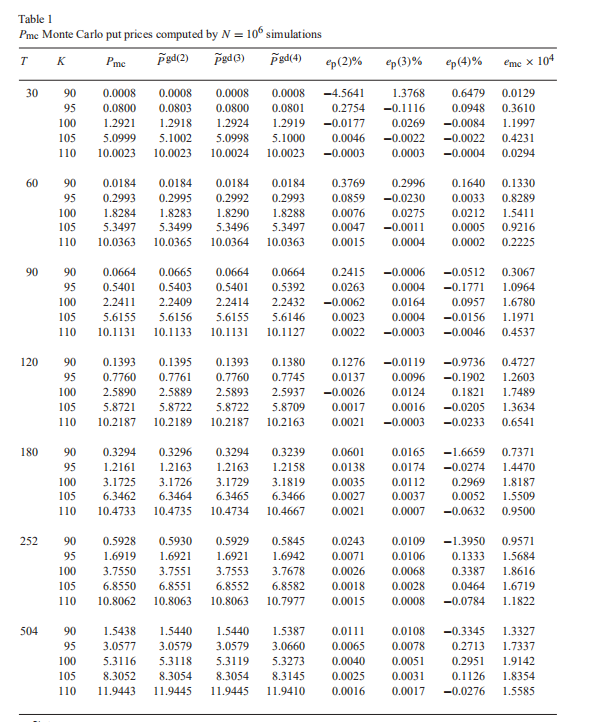

In [16]:
c_1=0.53
c_2=29.23
c_3=3.65

rho=0 # correlation between volatility and asset price
mr=c_2
vov=c_3
theta_ratio=1.0
sigma=np.sqrt(c_1/c_2) # start-up volatility
intr=0.0 # risk-free interest rate
divr=0.0 # dividend rate
strike=np.arange(90,115,5) # strike price
spot=100 # spot asset price
texp=1/252*np.array([30,60,90,120,180,252,504]) # time to maturity

garch = pf.GarchCondMC(sigma=sigma, vov=vov, rho=rho, mr=mr, theta=c_1/c_2)
garch.set_mc_params(dt=0.01, n_path=100000,rn_seed=123456)

In [17]:
p = garch.price(strike, spot, texp, cp=-1)
pd.DataFrame(data=p,columns=np.int64(np.around(texp*252)),index=strike)

,30,60,90,120,180,252,504
90,0.026253,0.162813,0.369707,0.601750,1.085551,1.652406,3.395680
95,0.322887,0.821210,1.282721,1.697724,2.432313,3.194693,5.295936
100,1.858105,2.644577,3.251536,3.758649,4.610641,5.461448,7.727594
105,5.375157,5.920522,6.417247,6.860844,7.642178,8.450116,10.669692
110,10.047842,10.249031,10.523241,10.815636,11.402300,12.070355,14.072077


The result in Barone-Adesi et al. (2004)'s paper is:
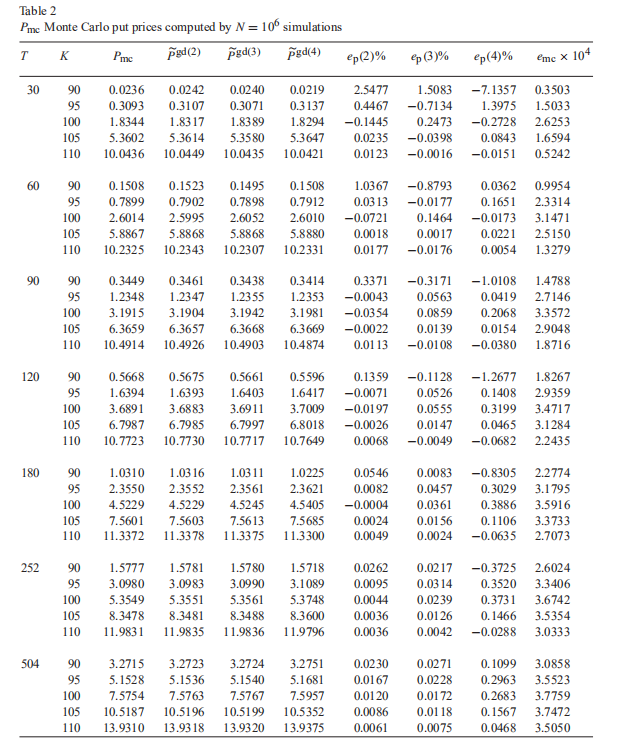

In [18]:
c_1=0.18
c_2=2
c_3=0.8

rho=0 # correlation between volatility and asset price
mr=c_2
vov=c_3
theta_ratio=1.0
sigma=np.sqrt(c_1/c_2) # start-up volatility
intr=0.0 # risk-free interest rate
divr=0.0 # dividend rate
strike=np.arange(90,115,5) # strike price
spot=100 # spot asset price
texp=1/252*np.array([30,60,90,120,180,252,504]) # time to maturity

garch = pf.GarchCondMC(sigma=sigma, vov=vov, rho=rho, mr=mr, theta=c_1/c_2)
garch.set_mc_params(dt=0.01, n_path=100000,rn_seed=123456)

In [19]:
p = garch.price(strike, spot, texp, cp=-1)
pd.DataFrame(data=p,columns=np.int64(np.around(texp*252)),index=strike)

,30,60,90,120,180,252,504
90,0.791058,1.907102,2.902513,3.788398,5.340696,6.940731,11.349985
95,2.002076,3.513431,4.715297,5.736477,7.467570,9.208072,13.896539
100,4.117848,5.809192,7.106076,8.192086,10.014132,11.831895,16.693898
105,7.185103,8.787175,10.056790,11.134046,12.958400,14.791316,19.725393
110,11.048374,12.365451,13.508898,14.515425,16.265311,18.058402,22.973020


The result in Barone-Adesi et al. (2004)'s paper is:
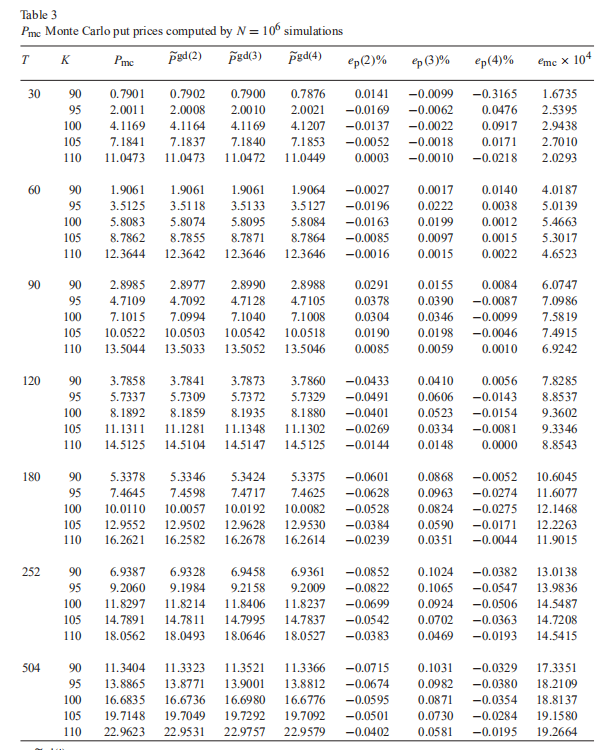